<a href="https://colab.research.google.com/github/manavg23/momentum_prediction/blob/main/Momentum_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn
import sklearn
import pandas as pd
import numpy as np

In [9]:
import pandas as pd

data = pd.read_csv("/content/data.csv")

# Function to compute average daily returns and standard deviation for a given period
def compute_statistics(data, window_size):
    data['Returns'] = (data['close'] / data['open'] - 1) * 100
    data['Rolling_Average_Returns'] = data['Returns'].rolling(window=window_size).mean()
    data['Rolling_Standard_Deviation'] = data['Returns'].rolling(window=window_size).std()
    return data

# Function to label each trading day as positive overreaction, negative overreaction, or normal day
def label_overreaction_days(data, k):
    data['Positive_Overreaction'] = data['Returns'] > (data['Rolling_Average_Returns'] + k * data['Rolling_Standard_Deviation'])
    data['Negative_Overreaction'] = data['Returns'] < (data['Rolling_Average_Returns'] - k * data['Rolling_Standard_Deviation'])
    data['Label'] = 'Normal'
    data.loc[data['Positive_Overreaction'], 'Label'] = 'Positive_Overreaction'
    data.loc[data['Negative_Overreaction'], 'Label'] = 'Negative_Overreaction'
    return data


k = 1  # Parameter for thresholding positive/negative overreaction
W = 50  # Size of the historical window

# Compute statistics using the specified historical window size
data = compute_statistics(data, window_size=W)

# Label each trading day based on the indicator function and parameters
data = label_overreaction_days(data, k=k)

# Display the labeled dataset
# print(data[['datetime', 'close', 'Returns', 'Rolling_Average_Returns', 'Rolling_Standard_Deviation', 'Label']])
data.head(10)


,datetime,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,...,21_ema,50_ema,200_ema,Fear_and_Greed_Index,Returns,Rolling_Average_Returns,Rolling_Standard_Deviation,Positive_Overreaction,Negative_Overreaction,Label
0,2020-07-16,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,...,9196.119258,9524.945856,9671.528810,43,-0.660334,NaN,NaN,False,False,Normal
1,2020-07-17,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,...,9206.292278,9560.413230,9718.271795,41,0.255834,NaN,NaN,False,False,Normal
2,2020-07-18,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,...,9216.465298,9595.880603,9765.014781,44,0.235518,NaN,NaN,False,False,Normal
3,2020-07-19,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,...,9226.638318,9631.347977,9811.757766,41,0.403669,NaN,NaN,False,False,Normal
4,2020-07-20,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,...,9236.811338,9666.815351,9858.500751,44,-0.574777,NaN,NaN,False,False,Normal
5,2020-07-21,9161.05,9438.00,9157.04,9394.14,9603.915113,2.886594e+06,0.006989,1.607883,3.230461e+07,...,9246.984357,9702.282724,9905.243737,44,2.544359,NaN,NaN,False,False,Normal
6,2020-07-22,9394.14,9567.77,9277.00,9536.18,10362.352648,2.900148e+06,0.007788,1.632192,5.920877e+07,...,9257.157377,9737.750098,9951.986722,50,1.512006,NaN,NaN,False,False,Normal
7,2020-07-23,9536.20,9686.00,9450.04,9613.24,12992.971919,2.899728e+06,0.011243,1.642599,8.216394e+07,...,9267.330397,9773.217471,9998.729708,55,0.807869,NaN,NaN,False,False,Normal
8,2020-07-24,9613.24,9645.55,9475.70,9551.21,9798.893466,2.902496e+06,0.008258,1.632343,5.445417e+07,...,9293.137634,9808.684845,10045.472693,53,-0.645256,NaN,NaN,False,False,Normal
9,2020-07-25,9551.21,9747.76,9536.64,9711.33,6973.110894,2.904662e+06,0.010736,1.658076,5.036880e+07,...,9331.155122,9844.152218,10092.215678,55,1.676437,NaN,NaN,False,False,Normal


In [19]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder




X = data[['open','close','high','low','volume','reserve','funding_rates','mvrv' , 'nrpl', 'nupl','stock_to_flow_reversion','sth_sopr','RSI','9_ema','21_ema','50_ema','200_ema','Fear_and_Greed_Index']]  # Features
y = data['Label']  # Target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_train)


knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm="ball_tree")
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 2 0 0 1 1 1 1 2 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 2 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1]
Model Accuracy: 0.7058823529411765


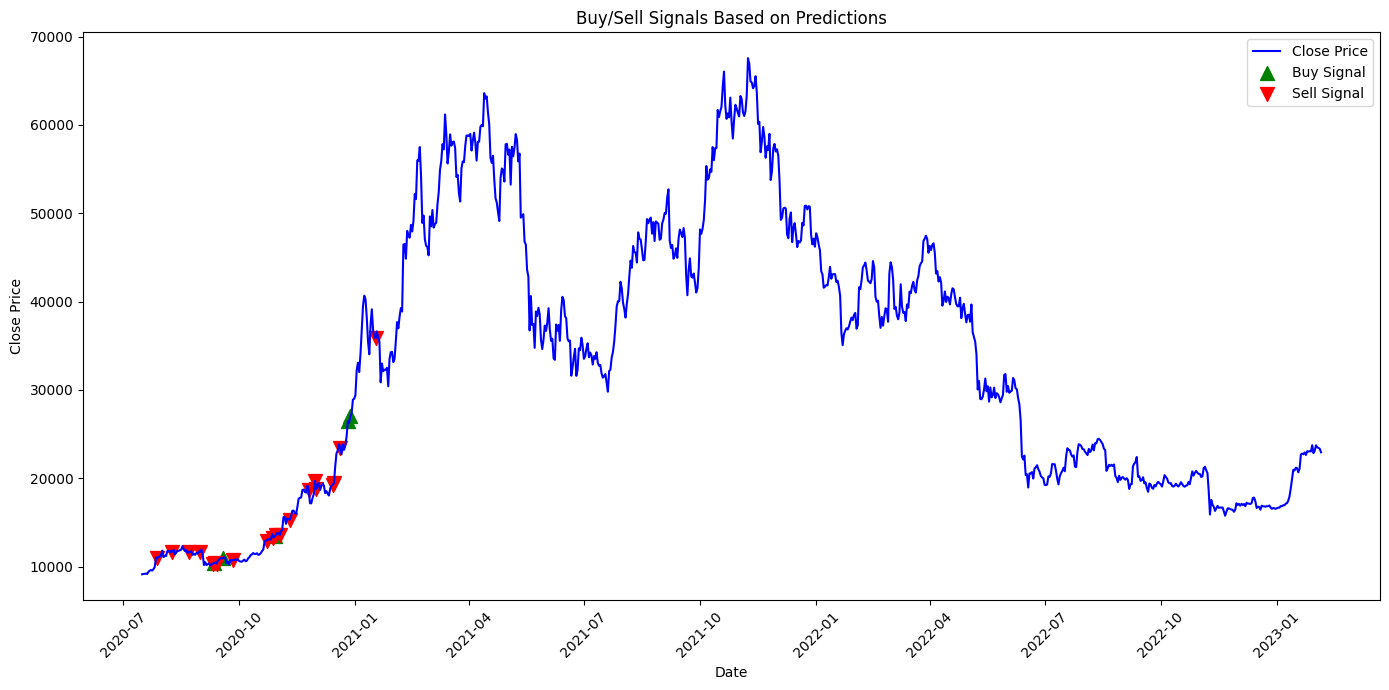

In [35]:
import matplotlib.pyplot as plt

# Plotting the close price
plt.figure(figsize=(14, 7))
plt.plot(data['datetime'], data['close'], label='Close Price', color='blue')

# Plotting buy signals
buy_indices = [i for i, label in enumerate(y_pred) if label == 2]
plt.scatter(data.iloc[buy_indices]['datetime'], data.iloc[buy_indices]['close'], label='Buy Signal', marker='^', color='green', alpha=1, s=100)

# Plotting sell signals
sell_indices = [i for i, label in enumerate(y_pred) if label == 0]
plt.scatter(data.iloc[sell_indices]['datetime'], data.iloc[sell_indices]['close'], label='Sell Signal', marker='v', color='red', alpha=1, s=100)

plt.title('Buy/Sell Signals Based on Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
